<a href="https://colab.research.google.com/github/Jason-Gitau/freecodecamp-LangGraph-for-beginners/blob/main/LangGraph_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Your task:

Make the graph on the right! You will need to make use of 2 conditional edges!

Input: initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)"""

In [ ]:
from typing import  TypedDict

# !pip install langgraph

from langgraph.graph import StateGraph,START,END

In [ ]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3: int
    number4: int
    operation2: str
    finalNumber: int
    finalNumber2: int

In [ ]:
def adder(state: AgentState):
  """ this node add 2 numbers"""
  state['finalNumber']=state['number1']+state['number2']
  return state

def subtractor(state: AgentState):
  """ this node subtract 2 numbers"""
  state['finalNumber']=state['number1']-state['number2']
  return state

def adder2(state: AgentState):
  """ this node add 2 numbers"""
  state['finalNumber2']=state['number3']+state['number4']
  return state

def subtractor2(state: AgentState):
  """ this node subtract 2 numbers"""
  state['finalNumber2']=state['number3']-state['number4']
  return state


def decider(state: AgentState):
  """ this node decide which operation to perform"""
  if state['operation']=='+':
    return "additional operation"
  elif state['operation']=='-':
    return "subtraction operation"
  else:
    return "no operation"

def decider2(state: AgentState):
  """ this node decide which operation to perform"""
  if state['operation2']=='+':
    return "additional operation"
  elif state['operation2']=='-':
    return "subtraction operation"

In [ ]:
graph=StateGraph(AgentState)

graph.add_node('router',lambda state:state)  #pass through function
graph.add_node("add_node1",adder)
graph.add_node("subtract_node1",subtractor)

graph.add_node('router2',lambda state:state)
graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",subtractor2)

############################################################################33

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decider,
    {
        # edge node
        "additional operation":"add_node1",
        "subtraction operation":"subtract_node1"
    }
)

graph.add_edge("add_node1","router2")
graph.add_edge("subtract_node1","router2")

graph.add_conditional_edges(
    "router2",
    decider2,
    {
        # edge node
        "additional operation":"add_node2",
        "subtraction operation":"subtract_node2"
    }
)
graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)

app=graph.compile()

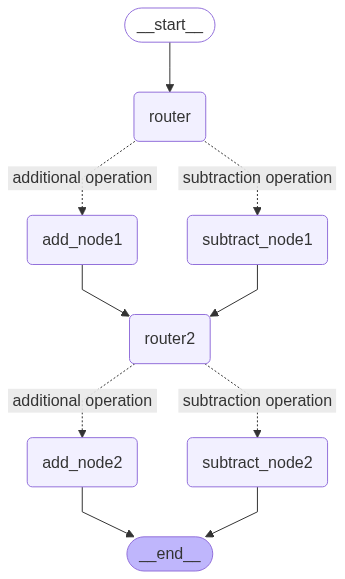

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+" )

In [ ]:
print(app.invoke(initial_state))

{'number1': 10, 'operation': '-', 'number2': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}
